##Imports

In [ ]:
import pandas as pd
import seaborn as sns
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from sklearn.cluster import KMeans
from IPython.display import Image
import graphviz
import sqlite3
from bs4 import BeautifulSoup

##Revenue

In [ ]:
# getting api data from hupspot

endpoint = 'crm/v3/objects/deals'

key = 'removed for GitHub pulic'

url = "https://api.hubapi.com/" + endpoint

deals_df = pd.DataFrame()

page = '0'

while page != 'stop':
  querystring = {"hapikey":key, "properties": ['product_id','dealstage','unit_price','ordered_quantity', 'sales_rep_id', 'amount'],"after":page} #
  headers = {'accept': 'application/json'}

  response = requests.request("GET", url, headers=headers, params=querystring)
  dic = json.loads(response.text)

  for deal in dic['results']:
    temp_df = pd.DataFrame(deal['properties'], index = [deal['id']])
    deals_df = pd.concat([deals_df, temp_df])

  try:
    page = dic['paging']['next']['after']
  except:
    page = 'stop'

deals_df

,amount,createdate,dealstage,hs_lastmodifieddate,hs_object_id,ordered_quantity,product_id,sales_rep_id,unit_price
9873696423,7130,2022-08-19T23:33:36.521Z,closedwon,2022-08-19T23:33:37.159Z,9873696423,230,462370,30108,31
9873696424,5635,2022-08-19T23:33:38.922Z,closedwon,2022-08-19T23:33:39.662Z,9873696424,49,462370,30108,115
9873696597,6750,2022-08-19T23:33:41.459Z,closedwon,2022-08-19T23:33:41.951Z,9873696597,225,462370,31458,30
9873696613,15732,2022-08-19T23:33:45.722Z,closedlost,2022-08-19T23:33:46.374Z,9873696613,207,462370,30108,76
9873696614,9861,2022-08-19T23:33:45.970Z,closedwon,2022-08-19T23:33:46.826Z,9873696614,173,462370,30108,57
...,...,...,...,...,...,...,...,...,...
9873946675,7910,2022-08-19T23:33:44.560Z,closedwon,2022-08-19T23:33:45.271Z,9873946675,226,462370,30108,35
9873946698,10875,2022-08-19T23:34:01.057Z,closedwon,2022-08-19T23:34:01.764Z,9873946698,145,279721,31458,75
9873946701,8896,2022-08-19T23:34:02.518Z,closedwon,2022-08-19T23:34:03.306Z,9873946701,139,279721,31458,64
9873946886,7676,2022-08-19T23:34:12.760Z,closedwon,2022-08-19T23:34:13.819Z,9873946886,38,305973,30108,202


##Clean up

In [ ]:
deals_won_df = deals_df[deals_df['dealstage']=='closedwon']
deals_won_df

#Earbuds product ID = 462370#

,amount,createdate,dealstage,hs_lastmodifieddate,hs_object_id,ordered_quantity,product_id,sales_rep_id,unit_price
9873696423,7130,2022-08-19T23:33:36.521Z,closedwon,2022-08-19T23:33:37.159Z,9873696423,230,462370,30108,31
9873696424,5635,2022-08-19T23:33:38.922Z,closedwon,2022-08-19T23:33:39.662Z,9873696424,49,462370,30108,115
9873696597,6750,2022-08-19T23:33:41.459Z,closedwon,2022-08-19T23:33:41.951Z,9873696597,225,462370,31458,30
9873696614,9861,2022-08-19T23:33:45.970Z,closedwon,2022-08-19T23:33:46.826Z,9873696614,173,462370,30108,57
9873696615,6375,2022-08-19T23:33:47.023Z,closedwon,2022-08-19T23:33:47.705Z,9873696615,51,462370,30108,125
...,...,...,...,...,...,...,...,...,...
9873946675,7910,2022-08-19T23:33:44.560Z,closedwon,2022-08-19T23:33:45.271Z,9873946675,226,462370,30108,35
9873946698,10875,2022-08-19T23:34:01.057Z,closedwon,2022-08-19T23:34:01.764Z,9873946698,145,279721,31458,75
9873946701,8896,2022-08-19T23:34:02.518Z,closedwon,2022-08-19T23:34:03.306Z,9873946701,139,279721,31458,64
9873946886,7676,2022-08-19T23:34:12.760Z,closedwon,2022-08-19T23:34:13.819Z,9873946886,38,305973,30108,202


In [ ]:
ear_buds_df = deals_won_df[deals_won_df['product_id']=='462370']
watch_df = deals_won_df[deals_won_df['product_id']=='279721']
monitor_df = deals_won_df[deals_won_df['product_id']=='305973']

In [ ]:
e_quantity = np.array(pd.to_numeric(ear_buds_df['ordered_quantity'])).reshape(-1, 1)
e_price = np.array(pd.to_numeric(ear_buds_df['unit_price'])).reshape(-1, 1)

s_quantity = np.array(pd.to_numeric(watch_df['ordered_quantity'])).reshape(-1, 1)
s_price = np.array(pd.to_numeric(watch_df['unit_price'])).reshape(-1, 1)

m_quantity = np.array(pd.to_numeric(monitor_df['ordered_quantity'])).reshape(-1, 1)
m_price = np.array(pd.to_numeric(monitor_df['unit_price'])).reshape(-1, 1)

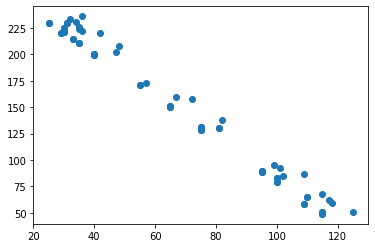

In [ ]:
plt.scatter(e_price, e_quantity)
plt.show()

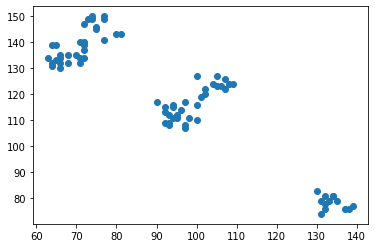

In [ ]:
plt.scatter(s_price, s_quantity)
plt.show()

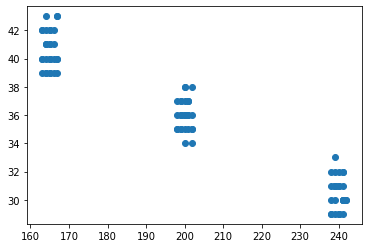

In [ ]:
plt.scatter(m_price, m_quantity)
plt.show()

##Analysis

In [ ]:
e_model = LinearRegression()
e_model.fit(e_price, e_quantity)

s_model = LinearRegression()
s_model.fit(s_price, s_quantity)

m_model = LinearRegression()
m_model.fit(m_price, m_quantity)

LinearRegression()

In [ ]:
e_price = np.linspace(0,400,100)
e_quant = e_model.predict(e_price.reshape(-1, 1))
e_quant = e_quant.reshape(len(e_quant))

s_price = np.linspace(0,400,100)
s_quant = s_model.predict(s_price.reshape(-1, 1))
s_quant = s_quant.reshape(len(s_quant))

m_price = np.linspace(0,400,100)
m_quant = m_model.predict(m_price.reshape(-1, 1))
m_quant = m_quant.reshape(len(m_quant))

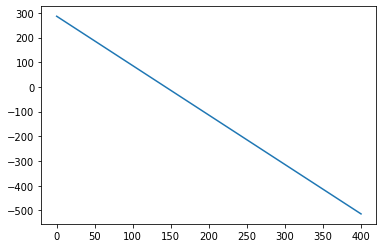

In [ ]:
plt.plot(e_price, e_quant)

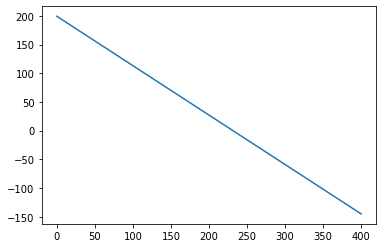

In [ ]:
plt.plot(s_price, s_quant)

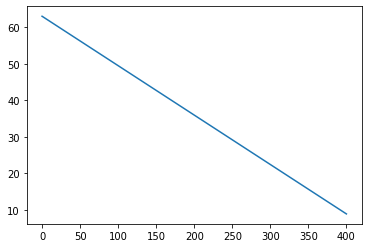

In [ ]:
plt.plot(m_price, m_quant)

In [ ]:
e_demand = pd.DataFrame({'price':e_price, 'quanity':e_quant})
e_demand['product'] = 'Linnet Bluetooth Earbuds'

s_demand = pd.DataFrame({'price':s_price, 'quanity':s_quant})
s_demand['product'] = 'Sidero Smartwatch'

m_demand = pd.DataFrame({'price':m_price, 'quanity':m_quant})
m_demand['product'] = 'Vasto Smart Monitor'

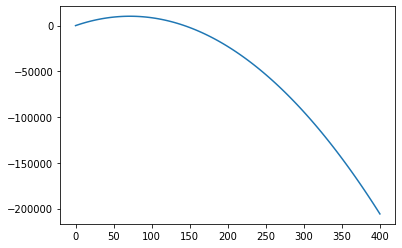

In [ ]:
e_rev = e_price * e_quant
plt.plot(e_price, e_rev)

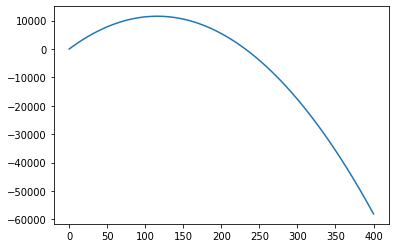

In [ ]:
s_rev = s_price * s_quant
plt.plot(s_price, s_rev)

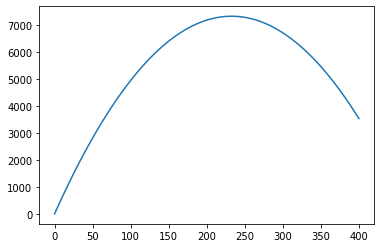

In [ ]:
m_rev = m_price * m_quant
plt.plot(m_price, m_rev)

In [ ]:
e_rev_df = pd.DataFrame({'price':e_price, 'revenue':e_rev})
e_rev_df['product'] = 'Linnet Bluetooth Earbuds'
e_rev_df

,price,revenue,product
0,0.000000,0.000000,Linnet Bluetooth Earbuds
1,4.040404,1124.189682,Linnet Bluetooth Earbuds
2,8.080808,2183.022099,Linnet Bluetooth Earbuds
3,12.121212,3176.497251,Linnet Bluetooth Earbuds
4,16.161616,4104.615138,Linnet Bluetooth Earbuds
...,...,...,...
95,383.838384,-185022.168351,Linnet Bluetooth Earbuds
96,387.878788,-190106.918842,Linnet Bluetooth Earbuds
97,391.919192,-195257.026598,Linnet Bluetooth Earbuds
98,395.959596,-200472.491619,Linnet Bluetooth Earbuds


In [ ]:
s_rev_df = pd.DataFrame({'price':s_price, 'revenue':s_rev})
s_rev_df['product'] = 'Sidero Smartwatch'
s_rev_df

,price,revenue,product
0,0.000000,0.000000,Sidero Smartwatch
1,4.040404,791.914801,Sidero Smartwatch
2,8.080808,1555.698545,Sidero Smartwatch
3,12.121212,2291.351232,Sidero Smartwatch
4,16.161616,2998.872863,Sidero Smartwatch
...,...,...,...
95,383.838384,-50373.262879,Sidero Smartwatch
96,387.878788,-52253.798482,Sidero Smartwatch
97,391.919192,-54162.465141,Sidero Smartwatch
98,395.959596,-56099.262858,Sidero Smartwatch


In [ ]:
m_rev_df = pd.DataFrame({'price':m_price, 'revenue':m_rev})
m_rev_df['product'] = 'Vasto Smart Monitor'
m_rev_df

,price,revenue,product
0,0.000000,0.000000,Vasto Smart Monitor
1,4.040404,252.449173,Vasto Smart Monitor
2,8.080808,500.475053,Vasto Smart Monitor
3,12.121212,744.077639,Vasto Smart Monitor
4,16.161616,983.256932,Vasto Smart Monitor
...,...,...,...
95,383.838384,4232.665239,Vasto Smart Monitor
96,387.878788,4064.901514,Vasto Smart Monitor
97,391.919192,3892.714495,Vasto Smart Monitor
98,395.959596,3716.104182,Vasto Smart Monitor


##Revenue Function

In [ ]:
def revenueOptimizer(deals_won_df,product_id,product_name):

  product_df = deals_won_df[deals_won_df['product_id']==product_id]


  q = np.array(pd.to_numeric(product_df['ordered_quantity'])).reshape(-1, 1)
  p = np.array(pd.to_numeric(product_df['unit_price'])).reshape(-1, 1)
 

  model = LinearRegression()
  model.fit(p,q)

  product_price = np.linspace(0,400,401)
  product_quant = model.predict(product_price.reshape(-1, 1)).reshape(1,-1)[0]
  product_rev = product_price * product_quant

  product_demand = pd.DataFrame({'price':product_price,'quantity': product_quant, 'revenue':product_rev})

  product_max = product_demand[product_demand['revenue'] == product_demand['revenue'].max()]


  product_demand['optimized_price'] = product_max['price'].iloc[0]
  product_demand['optimized_quantity'] = product_max['quantity'].iloc[0]
  product_demand['optimized_revenue'] = product_max['revenue'].iloc[0]

  product_demand['product id'] = product_id
  product_demand['prdouct name'] = product_name

  return(product_demand)

In [ ]:
e_rev_op_df = revenueOptimizer(deals_won_df, '462370', 'Earbuds')
s_rev_op_df = revenueOptimizer(deals_won_df, '279721', 'SmartWatch')
m_rev_op_df = revenueOptimizer(deals_won_df, '305973', 'Monitor')

In [ ]:
e_rev_op_df.head(10)

,price,quantity,revenue,optimized_price,optimized_quantity,optimized_revenue,product id,prdouct name
0,0.0,286.324908,0.000000,72.0,142.197433,10238.215187,462370,Earbuds
1,1.0,284.323137,284.323137,72.0,142.197433,10238.215187,462370,Earbuds
2,2.0,282.321367,564.642734,72.0,142.197433,10238.215187,462370,Earbuds
3,3.0,280.319596,840.958789,72.0,142.197433,10238.215187,462370,Earbuds
4,4.0,278.317826,1113.271304,72.0,142.197433,10238.215187,462370,Earbuds
5,5.0,276.316055,1381.580277,72.0,142.197433,10238.215187,462370,Earbuds
6,6.0,274.314285,1645.885710,72.0,142.197433,10238.215187,462370,Earbuds
7,7.0,272.312514,1906.187601,72.0,142.197433,10238.215187,462370,Earbuds
8,8.0,270.310744,2162.485952,72.0,142.197433,10238.215187,462370,Earbuds
9,9.0,268.308973,2414.780761,72.0,142.197433,10238.215187,462370,Earbuds


In [ ]:
e_demand.to_csv('earbud_demand_curve_faraday.csv')
e_rev_df.to_csv('earbud_revenue_curve_faraday.csv')

s_demand.to_csv('smartwatch_demand_curve_faraday.csv')
s_rev_df.to_csv('smartwatch_revenue_curve_faraday.csv')

m_demand.to_csv('monitor_demand_curve_faraday.csv')
m_rev_df.to_csv('monitor_revenue_curve_faraday.csv')

##Operations

##Extract Database Data

In [ ]:
# this was uploaded to the runtime manually to connect

conn = sqlite3.connect('faraday_database.db')

In [ ]:
sql = """
select pp.product_id, pp.part_id, category, weight, capital_equipment_id  
from parts ps
left join product_parts pp 
	on ps.id = pp.part_id
left join 
	(select product_id, capital_equipment_id 
	from operations o 
	group by product_id) oa
		on oa.product_id = pp.product_id		
"""

In [ ]:
df_main = pd.read_sql_query(sql, conn)
df_main

,product_id,part_id,category,weight,capital_equipment_id
0,817036,600818,Screens,3084.430000,3.0
1,305973,705943,Circuit Boards,53.000000,NaN
2,417986,877756,Circuit Boards,47.530237,3.0
3,401198,1129939,Batteries,122.280000,2.0
4,740381,1797490,Wires,10.304100,3.0
...,...,...,...,...,...
142,128234,98439770,Speakers,2040.000000,3.0
143,646620,99152485,Wires,0.010000,1.0
144,571695,99207026,Materials,52.800000,2.0
145,279721,99325175,Circuit Boards,4.000000,NaN


In [ ]:
df_parts = df_main.pivot_table(index='product_id', columns='category', values = 'weight')
df_parts 

category,Batteries,Circuit Boards,Materials,Microchips,Screens,Speakers,Wires
product_id,,,,,,,
128234,25.900580,44.801807,1696.43,34.00,3084.430,2040.00,11.025387
171430,130.000000,10.000000,40.00,20.00,70.000,30.00,3.000000
181821,133.900000,10.300000,41.20,20.60,72.100,30.90,3.090000
205342,3.000000,2.000000,1.00,1.00,3.500,0.00,1.000000
279721,6.000000,4.000000,1.00,5.00,3.000,0.00,1.000000
305973,20.000000,53.000000,997.90,20.00,1814.370,1200.00,11.025387
351924,0.000000,0.000000,1.08,0.00,0.000,1.60,0.020000
401198,122.280000,26.200000,34.94,34.94,87.340,43.67,6.990000
417986,30.772479,47.530237,1696.43,34.00,3084.430,2040.00,12.622966


In [ ]:
df_mech = df_main[['product_id','capital_equipment_id']].groupby(by=['product_id']).mean() #gets only unqiue rows
df_mech 

,capital_equipment_id
product_id,
128234,3.0
171430,2.0
181821,2.0
205342,1.0
279721,NaN
305973,NaN
351924,1.0
401198,2.0
417986,3.0


In [ ]:
df_ready = df_mech.merge(df_parts, left_index= True, right_index=True)
df_ready

,capital_equipment_id,Batteries,Circuit Boards,Materials,Microchips,Screens,Speakers,Wires
product_id,,,,,,,,
128234,3.0,25.900580,44.801807,1696.43,34.00,3084.430,2040.00,11.025387
171430,2.0,130.000000,10.000000,40.00,20.00,70.000,30.00,3.000000
181821,2.0,133.900000,10.300000,41.20,20.60,72.100,30.90,3.090000
205342,1.0,3.000000,2.000000,1.00,1.00,3.500,0.00,1.000000
279721,NaN,6.000000,4.000000,1.00,5.00,3.000,0.00,1.000000
305973,NaN,20.000000,53.000000,997.90,20.00,1814.370,1200.00,11.025387
351924,1.0,0.000000,0.000000,1.08,0.00,0.000,1.60,0.020000
401198,2.0,122.280000,26.200000,34.94,34.94,87.340,43.67,6.990000
417986,3.0,30.772479,47.530237,1696.43,34.00,3084.430,2040.00,12.622966


In [ ]:
df_test = df_ready[df_ready['capital_equipment_id'].isnull()]
df_train = df_ready[df_ready['capital_equipment_id'].notnull()]

##Machine Learning

<ipython-input-178-372603245185>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['capital_equipment_id'] = clf.predict(X_test)


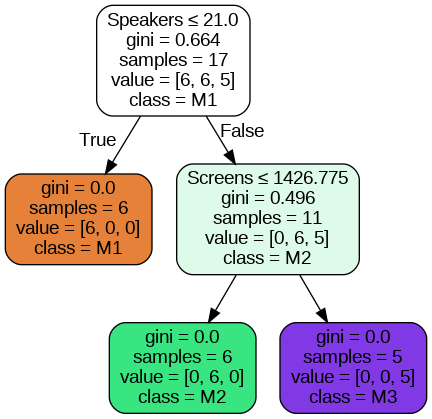

In [ ]:
y = df_train['capital_equipment_id']
X = df_train.drop(columns=['capital_equipment_id'])
clf = DecisionTreeClassifier().fit(X,y)
X_test = df_test.drop(columns=['capital_equipment_id'])
df_test['capital_equipment_id'] = clf.predict(X_test)

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns, #identifying the explanatory columns
                           class_names=['M1','M2','M3'], #identifying the target classifications
                           filled=True, rounded=True,
                           special_characters=True)



graph = graphviz.Source(dot_data)

Image(graph.render("Faraday", format='png'))

##Get Sankey Data

In [ ]:
sql = """
select pp.part_id as "Part ID", p.id as "product_id", p.name as "Product", 
	ps.category as "Part Type", ps.costs as "Part Cost", avg_batch_size as "Quantity",
	capital_equipment_id as "Machine", org.name as "Supplier"
from parts ps
left join product_parts pp 
	on ps.id = pp.part_id
left join products p on pp.product_id = p.id 
left join organizations org on ps.supplier_id = org.id	
left join 
	(select product_id, capital_equipment_id, sum(batch_size) as avg_batch_size
	from operations o 
	group by product_id) oa
		on oa.product_id = pp.product_id

"""

In [ ]:
df_sankey = pd.read_sql_query(sql, conn)
df_sankey

,Part ID,product_id,Product,Part Type,Part Cost,Quantity,Machine,Supplier
0,600818,817036,Digital Light Processing TV,Screens,60.792020,40.0,3.0,Avnet Inc
1,705943,305973,Vasto Smart Monitor,Circuit Boards,11.443200,NaN,NaN,Te Connectivity ltd
2,877756,417986,4K TV,Circuit Boards,10.261778,20.0,3.0,Te Connectivity ltd
3,1129939,401198,Ultra mobile PC,Batteries,52.472794,2.0,2.0,Philips
4,1797490,740381,OLED TV,Wires,4.010467,10.0,3.0,Philips
...,...,...,...,...,...,...,...,...
142,98439770,128234,Plasma Display Panels,Speakers,72.950400,30.0,3.0,Avnet Inc
143,99152485,646620,Mood Ring,Wires,0.341250,70.0,1.0,Philips
144,99207026,571695,Handheld PC,Materials,77.855556,6.0,2.0,Avnet Inc
145,99325175,279721,Sidero Smartwatch,Circuit Boards,3.175000,NaN,NaN,Te Connectivity ltd


In [ ]:
right = df_test['capital_equipment_id'].reset_index()
df_sankey = df_sankey.merge(right, how = 'left', on ='product_id') 
df_sankey

,Part ID,product_id,Product,Part Type,Part Cost,Quantity,Machine,Supplier,capital_equipment_id
0,600818,817036,Digital Light Processing TV,Screens,60.792020,40.0,3.0,Avnet Inc,NaN
1,705943,305973,Vasto Smart Monitor,Circuit Boards,11.443200,NaN,NaN,Te Connectivity ltd,3.0
2,877756,417986,4K TV,Circuit Boards,10.261778,20.0,3.0,Te Connectivity ltd,NaN
3,1129939,401198,Ultra mobile PC,Batteries,52.472794,2.0,2.0,Philips,NaN
4,1797490,740381,OLED TV,Wires,4.010467,10.0,3.0,Philips,NaN
...,...,...,...,...,...,...,...,...,...
142,98439770,128234,Plasma Display Panels,Speakers,72.950400,30.0,3.0,Avnet Inc,NaN
143,99152485,646620,Mood Ring,Wires,0.341250,70.0,1.0,Philips,NaN
144,99207026,571695,Handheld PC,Materials,77.855556,6.0,2.0,Avnet Inc,NaN
145,99325175,279721,Sidero Smartwatch,Circuit Boards,3.175000,NaN,NaN,Te Connectivity ltd,1.0


In [ ]:
df_sankey.loc[df_sankey['Machine'].isnull(),'Machine'] = df_sankey.loc[df_sankey['Machine'].isnull(),'capital_equipment_id']
df_sankey

,Part ID,product_id,Product,Part Type,Part Cost,Quantity,Machine,Supplier,capital_equipment_id
0,600818,817036,Digital Light Processing TV,Screens,60.792020,40.0,3.0,Avnet Inc,NaN
1,705943,305973,Vasto Smart Monitor,Circuit Boards,11.443200,NaN,3.0,Te Connectivity ltd,3.0
2,877756,417986,4K TV,Circuit Boards,10.261778,20.0,3.0,Te Connectivity ltd,NaN
3,1129939,401198,Ultra mobile PC,Batteries,52.472794,2.0,2.0,Philips,NaN
4,1797490,740381,OLED TV,Wires,4.010467,10.0,3.0,Philips,NaN
...,...,...,...,...,...,...,...,...,...
142,98439770,128234,Plasma Display Panels,Speakers,72.950400,30.0,3.0,Avnet Inc,NaN
143,99152485,646620,Mood Ring,Wires,0.341250,70.0,1.0,Philips,NaN
144,99207026,571695,Handheld PC,Materials,77.855556,6.0,2.0,Avnet Inc,NaN
145,99325175,279721,Sidero Smartwatch,Circuit Boards,3.175000,NaN,1.0,Te Connectivity ltd,1.0


In [ ]:
df_sankey.loc[df_sankey['product_id'] == 462370,'Quantity'] = round(revenueOptimizer(deals_won_df,'462370','Earbuds')['optimized_quantity'].iloc[0],0)
df_sankey.loc[df_sankey['product_id'] == 279721,'Quantity'] = round(revenueOptimizer(deals_won_df,'279721','Smartwatch')['optimized_quantity'].iloc[0],0)
df_sankey.loc[df_sankey['product_id'] == 305973,'Quantity'] = round(revenueOptimizer(deals_won_df,'305973','Smart Monitor')['optimized_quantity'].iloc[0],0)

In [ ]:
df_sankey.loc[df_sankey['Quantity'].isnull(),'Quantity'] = 0
df_sankey['Total Cost'] = df_sankey['Quantity'] * df_sankey['Part Cost']  
df_sankey

,Part ID,product_id,Product,Part Type,Part Cost,Quantity,Machine,Supplier,capital_equipment_id,Total Cost
0,600818,817036,Digital Light Processing TV,Screens,60.792020,40.0,3.0,Avnet Inc,NaN,2431.680788
1,705943,305973,Vasto Smart Monitor,Circuit Boards,11.443200,31.0,3.0,Te Connectivity ltd,3.0,354.739200
2,877756,417986,4K TV,Circuit Boards,10.261778,20.0,3.0,Te Connectivity ltd,NaN,205.235564
3,1129939,401198,Ultra mobile PC,Batteries,52.472794,2.0,2.0,Philips,NaN,104.945587
4,1797490,740381,OLED TV,Wires,4.010467,10.0,3.0,Philips,NaN,40.104673
...,...,...,...,...,...,...,...,...,...,...
142,98439770,128234,Plasma Display Panels,Speakers,72.950400,30.0,3.0,Avnet Inc,NaN,2188.512000
143,99152485,646620,Mood Ring,Wires,0.341250,70.0,1.0,Philips,NaN,23.887500
144,99207026,571695,Handheld PC,Materials,77.855556,6.0,2.0,Avnet Inc,NaN,467.133333
145,99325175,279721,Sidero Smartwatch,Circuit Boards,3.175000,100.0,1.0,Te Connectivity ltd,1.0,317.500000


##Sankey

In [ ]:
df_sankey_t1 = df_sankey.copy()
df_sankey_t1['Table Name'] = 1

df_sankey_t2 = df_sankey.copy()
df_sankey_t2['Table Name'] = 2

In [ ]:
DF_sankey = pd.concat([df_sankey_t1, df_sankey_t2])

In [ ]:
DF_sankey.to_csv('Sankey_Chart.csv',index = False)

##Marketing

In [ ]:
url = 'https://stephenms315.github.io/ens/electronicproductreviews'

request = requests.get(url)
source = request.content
soup = BeautifulSoup(source, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="" name="description"/>
<meta content="" name="author"/>
<title>E&amp;S Electronic Reports - Product Reviews</title>
<link href="assets/favicon.ico" rel="icon" type="image/x-icon"/>
<!-- Font Awesome icons (free version)-->
<script crossorigin="anonymous" src="https://use.fontawesome.com/releases/v6.1.0/js/all.js"></script>
<!-- Google fonts-->
<link href="https://fonts.googleapis.com/css?family=Varela+Round" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Nunito:200,200i,300,300i,400,400i,600,600i,700,700i,800,800i,900,900i" rel="stylesheet"/>
<!-- Core theme CSS (includes Bootstrap)-->
<link href="css/styles.css" rel="stylesheet"/>
</head>
<body id="page-top">
<!-- Navigation-->
<nav class="navbar navbar-expand-lg navbar-light fixed-top" id="mainNav">
<div class="container px-4 px-lg-5">
<a class=

In [ ]:
tables = soup.findAll('table', {'class': 'table table-bordered table-hover table-condensed'})
tables

[<table class="table table-bordered table-hover table-condensed">
 <thead><tr><th title="Field #1">Product</th>
 <th title="Field #2">Cost</th>
 <th title="Field #3">Audio Quality</th>
 <th title="Field #4">Portability</th>
 <th title="Field #5">Water-Resistance</th>
 <th title="Field #6">Battery Life</th>
 <th title="Field #7">Noise-Cancelling Microphone</th>
 <th title="Field #8">Iphone Compatibility</th>
 <th title="Field #9">Android Compatibility</th>
 <th title="Field #10">Volume</th>
 <th title="Field #11">Bluetooth</th>
 </tr></thead>
 <tbody><tr>
 <td>Linnet Bluetooth Earbuds</td>
 <td align="right">70</td>
 <td align="right">7</td>
 <td align="right">10</td>
 <td align="right">8</td>
 <td align="right">9</td>
 <td align="right">9</td>
 <td>1</td>
 <td>1</td>
 <td align="right">7</td>
 <td>1</td>
 </tr>
 <tr>
 <td>Apple AirPods</td>
 <td align="right">130</td>
 <td align="right">8</td>
 <td align="right">10</td>
 <td align="right">8</td>
 <td align="right">9</td>
 <td align="ri

In [ ]:
headphones_df = pd.read_html(str(tables))[0]

watches_df = pd.read_html(str(tables))[1]

monitors_df = pd.read_html(str(tables))[2]

In [ ]:
web_df = pd.DataFrame()
p = 1

for table in tables:
  temp_df = pd.read_html(str(table))[0] #table
  temp_df['Product Type' + str(p)] = 1
  web_df = pd.concat([web_df,temp_df])
  p = p + 1


web_df = web_df.fillna(0)
web_df 

,Product,Cost,Audio Quality,Portability,Water-Resistance,Battery Life,Noise-Cancelling Microphone,Iphone Compatibility,Android Compatibility,Volume,...,Product Type1,Screen Resolution,Gamma,Heartbeat,Oxygen,Apps,Product Type2,Resolution,TV,Product Type3
0,Linnet Bluetooth Earbuds,70,7.0,10,8.0,9.0,9.0,1,1,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Apple AirPods,130,8.0,10,8.0,9.0,10.0,1,0,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Wired,20,7.0,9,5.0,0.0,0.0,0,1,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,APEKX Bluetooth Headphones,35,5.0,10,3.0,5.0,0.0,1,1,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ltinist Wireless Earbud,30,5.0,10,3.0,5.0,0.0,1,1,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Raycon Earbuds,90,7.0,10,7.0,7.0,6.0,1,1,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,JBL Tune 710BT,80,9.0,6,5.0,10.0,10.0,1,1,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Beats Wireless Headphones,100,9.0,6,3.0,0.0,10.0,1,1,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Jabra Evolve 40 Professional Wired Headset,127,10.0,5,2.0,0.0,10.0,1,1,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Sidero Smartwatch,120,0.0,10,9.0,5.0,0.0,1,1,0.0,...,0.0,3.0,7.0,7.0,6.0,5.0,1.0,0.0,0.0,0.0


In [ ]:
h_df = headphones_df.copy()

names_col = 'Product'
names = h_df[names_col]

h_df_ready = headphones_df.drop(columns=[names_col])

h_df_ready 

,Cost,Audio Quality,Portability,Water-Resistance,Battery Life,Noise-Cancelling Microphone,Iphone Compatibility,Android Compatibility,Volume,Bluetooth
0,70,7,10,8,9,9,1,1,7,1
1,130,8,10,8,9,10,1,0,8,1
2,20,7,9,5,0,0,0,1,5,0
3,35,5,10,3,5,0,1,1,3,1
4,30,5,10,3,5,0,1,1,3,1
5,90,7,10,7,7,6,1,1,5,1
6,80,9,6,5,10,10,1,1,9,1
7,100,9,6,3,0,10,1,1,10,0
8,127,10,5,2,0,10,1,1,10,0


In [ ]:
w_df = watches_df.copy()

names_col = 'Product'
names = w_df[names_col]

w_df_ready = watches_df.drop(columns=[names_col])

w_df_ready 

,Cost,Portability,Water-Resistance,Battery Life,Iphone Compatibility,Android Compatibility,Screen Resolution,Gamma,Bluetooth,Heartbeat,Oxygen,Apps
0,120,10,9,5,1,1,3,7,1,7,6,5
1,157,10,9,3,1,1,3,7,1,10,7,2
2,400,10,9,5,1,0,3,7,1,10,6,7
3,309,10,9,4,1,1,3,7,1,6,0,6
4,59,10,5,5,1,1,3,5,1,5,0,4
5,69,10,7,7,1,1,1,3,1,7,0,0
6,19,10,2,7,1,1,1,3,1,6,0,0
7,13,10,10,10,0,0,1,2,1,0,0,0


In [ ]:
m_df = monitors_df.copy()

names_col = 'Product'
names = m_df[names_col]

m_df_ready = monitors_df.drop(columns=[names_col])

m_df_ready 

,Cost,Portability,Iphone Compatibility,Android Compatibility,Screen Resolution,Volume,Gamma,Bluetooth,Apps,Resolution,TV
0,230,1,1,1,9,9,9,1,3,9,1
1,399,1,0,0,10,10,10,0,0,10,1
2,4999,1,1,0,8,8,9,1,2,8,1


In [ ]:
h_x = MinMaxScaler().fit_transform(h_df_ready)
h_x

array([[0.45454545, 0.4       , 1.        , 1.        , 0.9       ,
        0.9       , 1.        , 1.        , 0.57142857, 1.        ],
       [1.        , 0.6       , 1.        , 1.        , 0.9       ,
        1.        , 1.        , 0.        , 0.71428571, 1.        ],
       [0.        , 0.4       , 0.8       , 0.5       , 0.        ,
        0.        , 0.        , 1.        , 0.28571429, 0.        ],
       [0.13636364, 0.        , 1.        , 0.16666667, 0.5       ,
        0.        , 1.        , 1.        , 0.        , 1.        ],
       [0.09090909, 0.        , 1.        , 0.16666667, 0.5       ,
        0.        , 1.        , 1.        , 0.        , 1.        ],
       [0.63636364, 0.4       , 1.        , 0.83333333, 0.7       ,
        0.6       , 1.        , 1.        , 0.28571429, 1.        ],
       [0.54545455, 0.8       , 0.2       , 0.5       , 1.        ,
        1.        , 1.        , 1.        , 0.85714286, 1.        ],
       [0.72727273, 0.8       , 0.2      

In [ ]:
w_x = MinMaxScaler().fit_transform(w_df_ready)
w_x

array([[0.27648579, 0.        , 0.875     , 0.28571429, 1.        ,
        1.        , 1.        , 1.        , 0.        , 0.7       ,
        0.85714286, 0.71428571],
       [0.37209302, 0.        , 0.875     , 0.        , 1.        ,
        1.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 0.28571429],
       [1.        , 0.        , 0.875     , 0.28571429, 1.        ,
        0.        , 1.        , 1.        , 0.        , 1.        ,
        0.85714286, 1.        ],
       [0.76485788, 0.        , 0.875     , 0.14285714, 1.        ,
        1.        , 1.        , 1.        , 0.        , 0.6       ,
        0.        , 0.85714286],
       [0.11886305, 0.        , 0.375     , 0.28571429, 1.        ,
        1.        , 1.        , 0.6       , 0.        , 0.5       ,
        0.        , 0.57142857],
       [0.14470284, 0.        , 0.625     , 0.57142857, 1.        ,
        1.        , 0.        , 0.2       , 0.        , 0.7       ,
        0.        ,

In [ ]:
m_x = MinMaxScaler().fit_transform(m_df_ready)
m_x

array([[0.        , 0.        , 1.        , 1.        , 0.5       ,
        0.5       , 0.        , 1.        , 1.        , 0.5       ,
        0.        ],
       [0.0354372 , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.66666667, 0.        ,
        0.        ]])

##PCA

In [ ]:
h_pca = PCA(n_components=2)
h_model = h_pca.fit_transform(h_x)

h_pca_df = pd.DataFrame(data = h_model, columns = ['PC1', 'PC2'])
h_pca_df

,PC1,PC2
0,-0.292058,-0.681357
1,0.074327,-1.165361
2,-0.318805,1.218600
3,-1.016772,0.368263
4,-1.031084,0.380766
5,-0.433357,-0.416849
6,0.445858,-0.572804
7,1.155709,0.431498
8,1.416182,0.437244


In [ ]:
w_pca = PCA(n_components=2)
w_model = w_pca.fit_transform(w_x)

w_pca_df = pd.DataFrame(data = w_model, columns = ['PC1', 'PC2'])
w_pca_df

,PC1,PC2
0,-0.737168,-0.059037
1,-0.817394,-0.174980
2,-1.058117,0.807971
3,-0.642662,-0.108389
4,-0.045445,-0.439272
5,0.828876,-0.398241
6,0.970958,-0.661474
7,1.500953,1.033421


In [ ]:
m_pca = PCA(n_components=2)
m_model = m_pca.fit_transform(m_x)

m_pca_df = pd.DataFrame(data = m_model, columns = ['PC1', 'PC2'])
m_pca_df

,PC1,PC2
0,-0.546761,0.891900
1,1.603060,-0.170890
2,-1.056299,-0.721011


In [ ]:
loadings = h_pca.components_.T * np.sqrt(h_pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=h_pca_df.columns, index=h_df_ready.columns)
loading_matrix.abs().idxmax(1).sort_values()

Cost                           PC1
Audio Quality                  PC1
Portability                    PC1
Noise-Cancelling Microphone    PC1
Volume                         PC1
Water-Resistance               PC2
Battery Life                   PC2
Iphone Compatibility           PC2
Android Compatibility          PC2
Bluetooth                      PC2
dtype: object

In [ ]:
loading_matrix.abs().idxmax(0).sort_index()

PC1     Portability
PC2    Battery Life
dtype: object

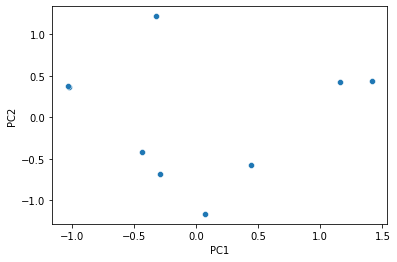

In [ ]:
sns.scatterplot(data=h_pca_df, x='PC1', y='PC2', legend=False)

In [ ]:
loadings = w_pca.components_.T * np.sqrt(w_pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=w_pca_df.columns, index=w_df_ready.columns)
loading_matrix.abs().idxmax(1).sort_values()

Cost                     PC1
Portability              PC1
Battery Life             PC1
Screen Resolution        PC1
Gamma                    PC1
Bluetooth                PC1
Heartbeat                PC1
Oxygen                   PC1
Apps                     PC1
Water-Resistance         PC2
Iphone Compatibility     PC2
Android Compatibility    PC2
dtype: object

In [ ]:
loading_matrix.abs().idxmax(0).sort_index()

PC1        Screen Resolution
PC2    Android Compatibility
dtype: object

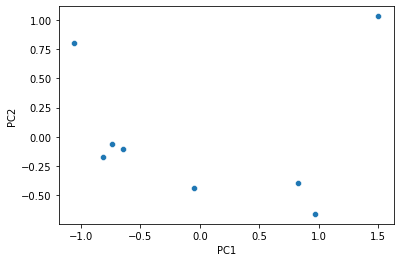

In [ ]:
sns.scatterplot(data=w_pca_df, x='PC1', y='PC2', legend=False)

In [ ]:
loadings = m_pca.components_.T * np.sqrt(m_pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=m_pca_df.columns, index=m_df_ready.columns)
loading_matrix.abs().idxmax(1).sort_values()

Portability              PC1
Iphone Compatibility     PC1
Screen Resolution        PC1
Volume                   PC1
Gamma                    PC1
Bluetooth                PC1
Apps                     PC1
Resolution               PC1
TV                       PC1
Cost                     PC2
Android Compatibility    PC2
dtype: object

In [ ]:
loading_matrix.abs().idxmax(0).sort_index()

PC1                    Gamma
PC2    Android Compatibility
dtype: object

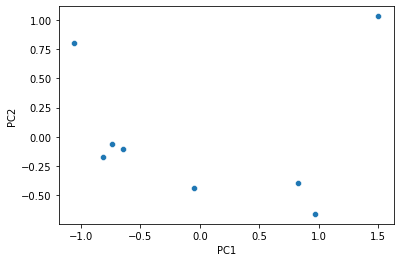

In [ ]:
sns.scatterplot(data=w_pca_df, x='PC1', y='PC2', legend=False)

##Clustering

In [ ]:
h_X = h_pca_df
w_X = w_pca_df
m_X = m_pca_df

In [ ]:
## headphones first

Sum_of_squared_distances = []
K = range(2,len(h_X)-1)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(h_X)
    Sum_of_squared_distances.append(km.inertia_)
Elbow_df = pd.DataFrame({'K': K, 'SSD': Sum_of_squared_distances})
Elbow_df['Bend'] = Elbow_df['SSD'].shift(1) - Elbow_df['SSD']
Elbow_df

,K,SSD,Bend
0,2,5.746951,NaN
1,3,1.620384,4.126567
2,4,0.813931,0.806453
3,5,0.323665,0.490266
4,6,0.079085,0.244579
5,7,0.034120,0.044965


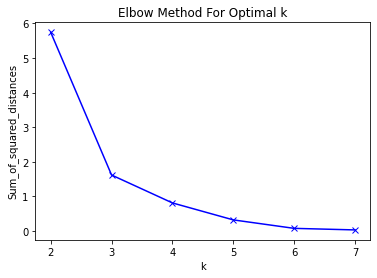

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
try:
  k = int(Elbow_df.loc[Elbow_df['Bend'].idxmax()]['K'])
except:
  k = 1

km = KMeans(n_clusters=k)
y_km = km.fit_predict(h_X)

km_output = headphones_df.copy()
km_output['Group'] = y_km
km_output

,Product,Cost,Audio Quality,Portability,Water-Resistance,Battery Life,Noise-Cancelling Microphone,Iphone Compatibility,Android Compatibility,Volume,Bluetooth,Group
0,Linnet Bluetooth Earbuds,70,7,10,8,9,9,1,1,7,1,0
1,Apple AirPods,130,8,10,8,9,10,1,0,8,1,0
2,Wired,20,7,9,5,0,0,0,1,5,0,2
3,APEKX Bluetooth Headphones,35,5,10,3,5,0,1,1,3,1,2
4,Ltinist Wireless Earbud,30,5,10,3,5,0,1,1,3,1,2
5,Raycon Earbuds,90,7,10,7,7,6,1,1,5,1,0
6,JBL Tune 710BT,80,9,6,5,10,10,1,1,9,1,0
7,Beats Wireless Headphones,100,9,6,3,0,10,1,1,10,0,1
8,Jabra Evolve 40 Professional Wired Headset,127,10,5,2,0,10,1,1,10,0,1


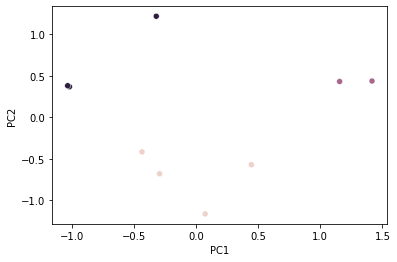

In [ ]:
group_map = pd.merge(km_output, h_pca_df, how='inner', left_index=True, right_index=True)
sns.scatterplot(data=group_map , x='PC1', y='PC2', hue = 'Group', legend=False)

In [ ]:
group_map.to_csv('headphones_group_map.csv',index = False)

In [ ]:
## smartwatches next

Sum_of_squared_distances = []
K = range(2,len(w_X)-1)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(w_X)
    Sum_of_squared_distances.append(km.inertia_)
Elbow_df = pd.DataFrame({'K': K, 'SSD': Sum_of_squared_distances})
Elbow_df['Bend'] = Elbow_df['SSD'].shift(1) - Elbow_df['SSD']
Elbow_df

,K,SSD,Bend
0,2,3.373489,NaN
1,3,1.385361,1.988127
2,4,0.500034,0.885327
3,5,0.066810,0.433224
4,6,0.022071,0.044739


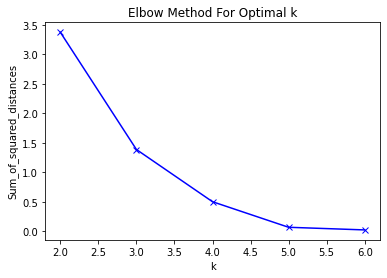

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
try:
  k = int(Elbow_df.loc[Elbow_df['Bend'].idxmax()]['K'])
except:
  k = 1

km = KMeans(n_clusters=k)
y_km = km.fit_predict(w_X)

km_output = watches_df.copy()
km_output['Group'] = y_km
km_output

,Product,Cost,Portability,Water-Resistance,Battery Life,Iphone Compatibility,Android Compatibility,Screen Resolution,Gamma,Bluetooth,Heartbeat,Oxygen,Apps,Group
0,Sidero Smartwatch,120,10,9,5,1,1,3,7,1,7,6,5,2
1,Fitbit Versa 3,157,10,9,3,1,1,3,7,1,10,7,2,2
2,Apple Watch,400,10,9,5,1,0,3,7,1,10,6,7,2
3,SAMSUNG Galaxy Watch,309,10,9,4,1,1,3,7,1,6,0,6,2
4,Amazfit Bip 3 Smart Watch,59,10,5,5,1,1,3,5,1,5,0,4,0
5,Fitbit Inspire 2,69,10,7,7,1,1,1,3,1,7,0,0,0
6,ENGERWALL Fitness Tracker,19,10,2,7,1,1,1,3,1,6,0,0,0
7,Casio F91W-1 Classic,13,10,10,10,0,0,1,2,1,0,0,0,1


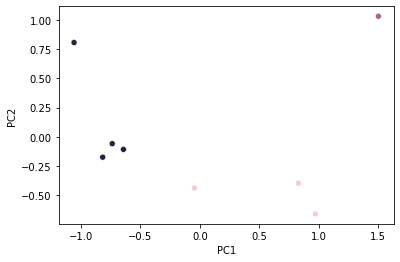

In [ ]:
group_map = pd.merge(km_output, w_pca_df, how='inner', left_index=True, right_index=True)
sns.scatterplot(data=group_map , x='PC1', y='PC2', hue = 'Group', legend=False)

In [ ]:
group_map.to_csv('watches_group_map.csv',index = False)

In [ ]:
## monitors last

Sum_of_squared_distances = []
K = range(2,len(m_X)-1)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(m_X)
    Sum_of_squared_distances.append(km.inertia_)
Elbow_df = pd.DataFrame({'K': K, 'SSD': Sum_of_squared_distances})
Elbow_df['Bend'] = Elbow_df['SSD'].shift(1) - Elbow_df['SSD']
Elbow_df

,K,SSD,Bend


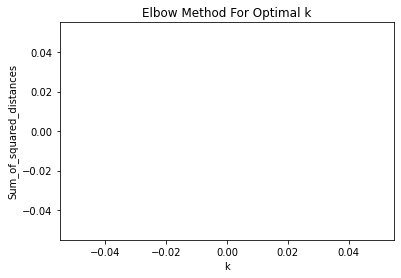

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
try:
  k = int(Elbow_df.loc[Elbow_df['Bend'].idxmax()]['K'])
except:
  k = 1

km = KMeans(n_clusters=k)
y_km = km.fit_predict(m_X)

km_output = monitors_df.copy()
km_output['Group'] = y_km
km_output

,Product,Cost,Portability,Iphone Compatibility,Android Compatibility,Screen Resolution,Volume,Gamma,Bluetooth,Apps,Resolution,TV,Group
0,Vasto Smart Monitor,230,1,1,1,9,9,9,1,3,9,1,0
1,Crystal UHD 4K Smart TV,399,1,0,0,10,10,10,0,0,10,1,0
2,Apple 32-inch Pro Display XDR,4999,1,1,0,8,8,9,1,2,8,1,0


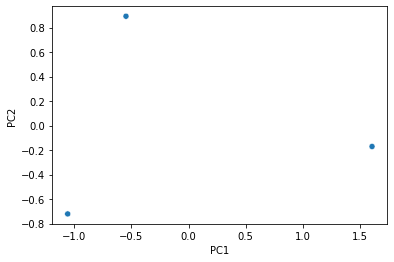

In [ ]:
group_map = pd.merge(km_output, m_pca_df, how='inner', left_index=True, right_index=True)
sns.scatterplot(data=group_map , x='PC1', y='PC2', hue = 'Group', legend=False)

In [ ]:
group_map.to_csv('monitors_group_map.csv',index = False)